# Insurance Claims- Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\Automobile_insurance_fraud.csv')
pd.set_option("display.max_columns",None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## EDA

In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop(['_c39'],axis=1,inplace=True)

In [7]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [8]:
df.drop(['umbrella_limit'],axis=1,inplace=True)

In [9]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [10]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [12]:
df.replace('?', np.nan, inplace = True)

In [13]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [14]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

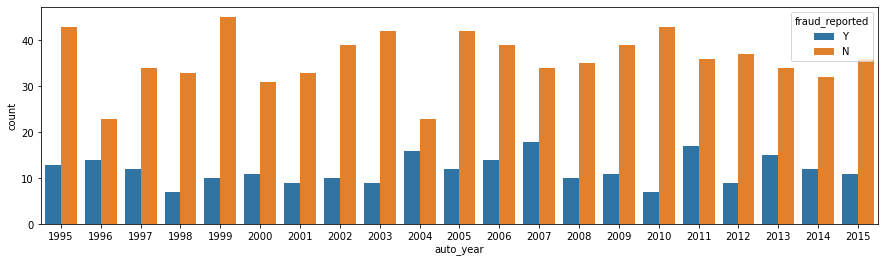

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])

### There is no significant relation between auto year and fraud reported.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

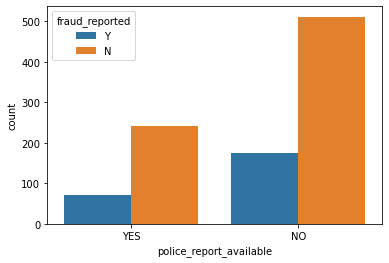

In [16]:
sns.countplot(df['police_report_available'],hue=df['fraud_reported'])

### There is no significant relation between police report available and fraud reported.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

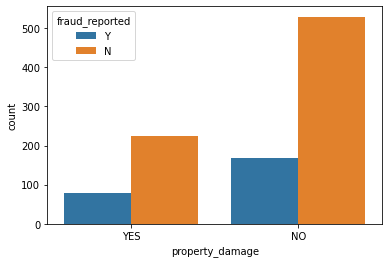

In [17]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])

### There is no significant relation between police report available and fraud reported.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

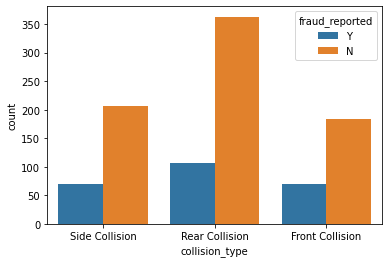

In [18]:
sns.countplot(df['collision_type'],hue=df['fraud_reported'])

### There is no significant relation between police report available and fraud reported.

In [19]:
# dropping columns which are not necessary for prediction

not_nec = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(not_nec, inplace = True, axis = 1)

In [20]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [21]:
df.dtypes

months_as_customer               int64
age                              int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported           

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

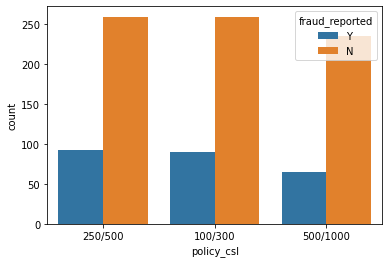

In [22]:
sns.countplot(df['policy_csl'],hue=df['fraud_reported'])

### There is no significant relation between policy_csl available and fraud reported.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

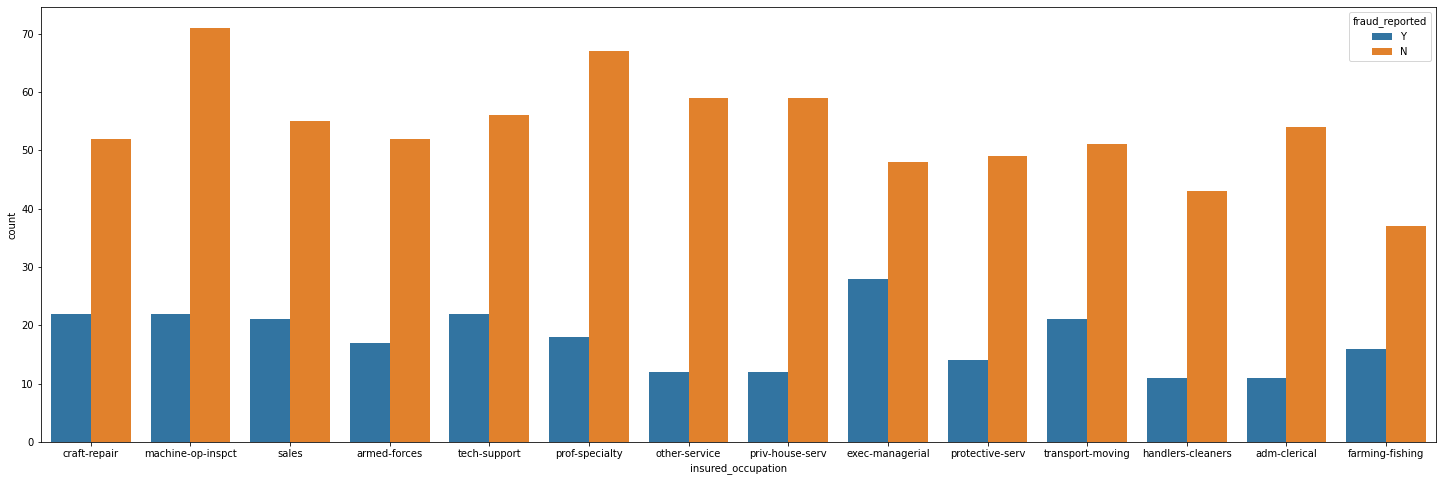

In [23]:
plt.figure(figsize=(25,8))
sns.countplot(df['insured_occupation'],hue=df['fraud_reported'])

### There are more fraud detections in exec-managerial field.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

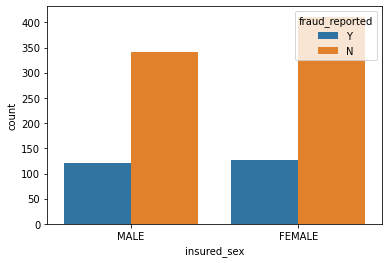

In [24]:
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])

###  Comparitively, there are more fraud detections found in male_insured.

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

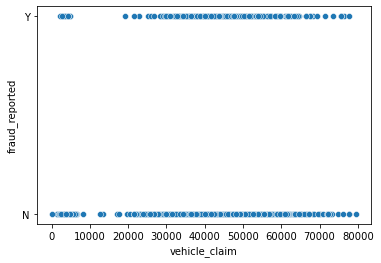

In [25]:
sns.scatterplot(df['vehicle_claim'],df['fraud_reported'])

### If the vehicle_claim is less, then there is little chance fraud reported will be No. 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

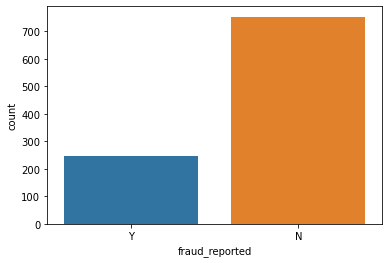

In [26]:
sns.countplot(df['fraud_reported'])

### There is a class imbalance in the target variable

In [27]:
# Extracting continuous columns

t = df.select_dtypes(include = ['int64','float64'])

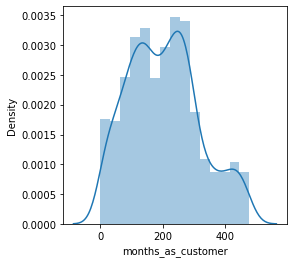

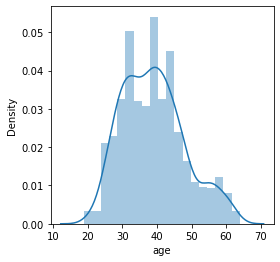

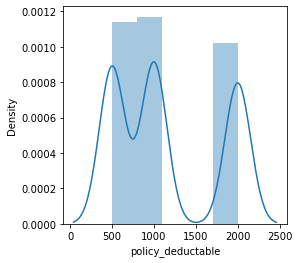

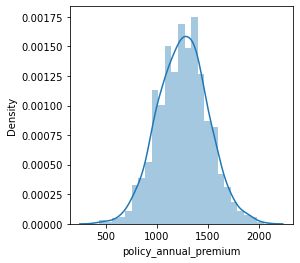

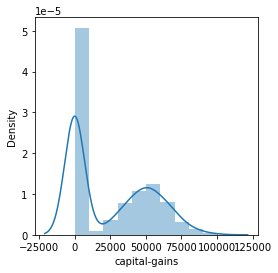

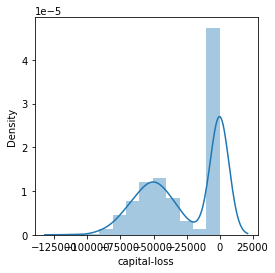

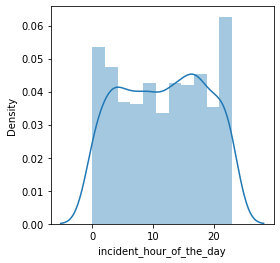

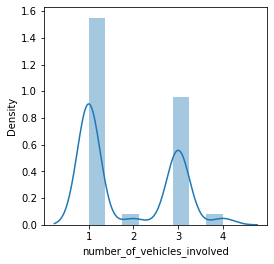

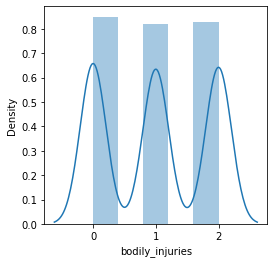

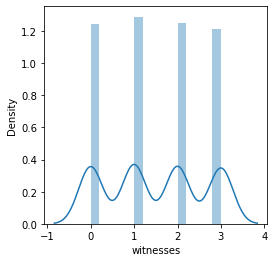

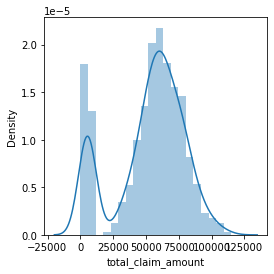

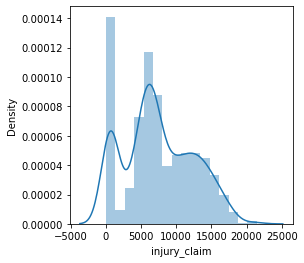

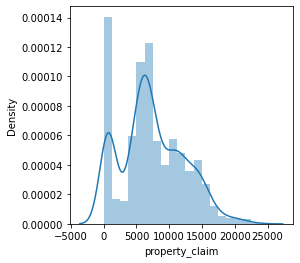

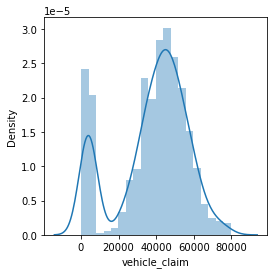

In [28]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])

### There are many columns which are not notmally distributed

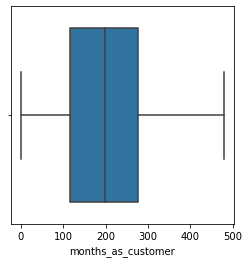

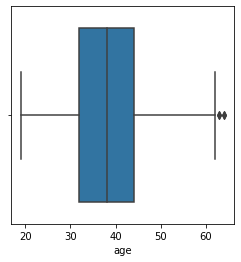

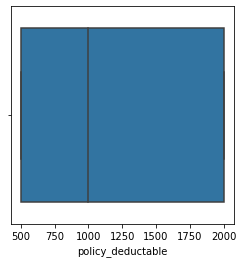

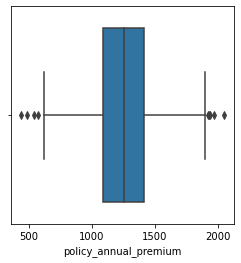

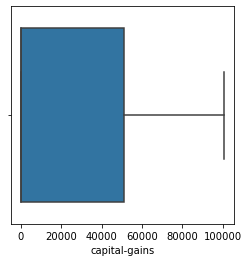

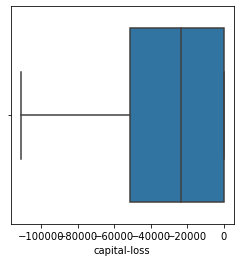

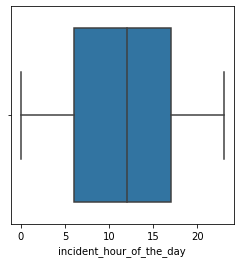

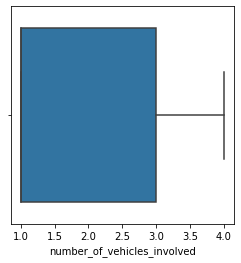

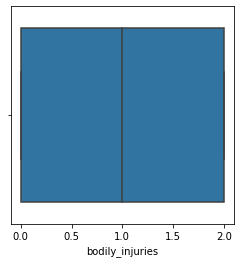

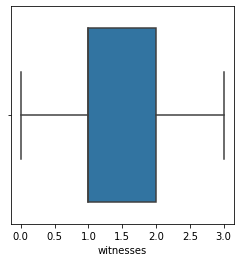

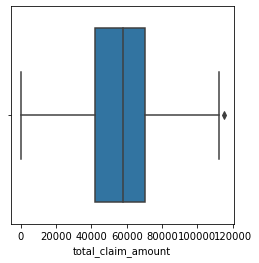

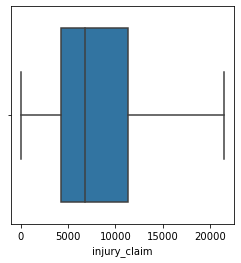

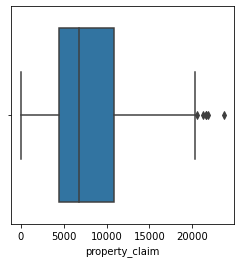

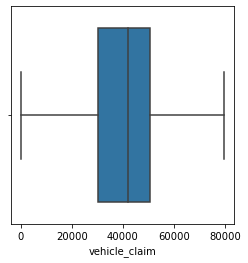

In [29]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### There are outliers present in some of the columns.

## Outliers Removals

In [30]:
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker.

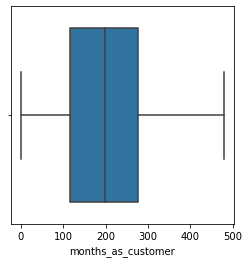

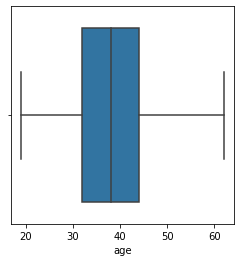

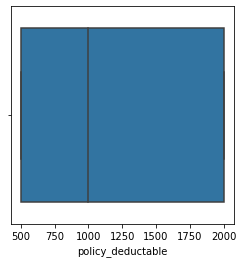

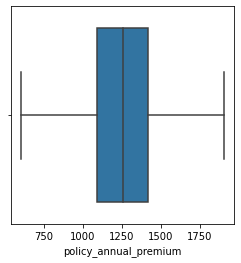

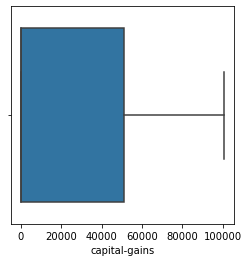

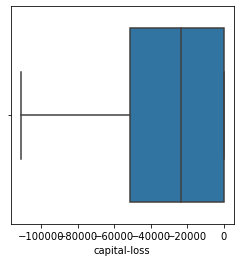

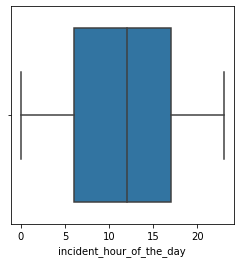

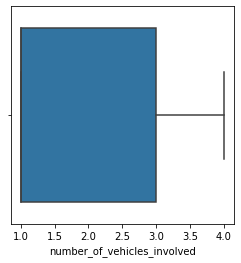

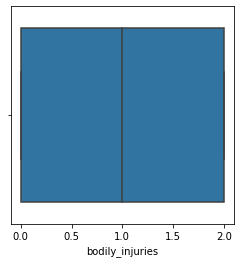

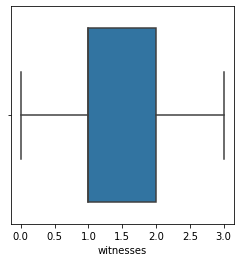

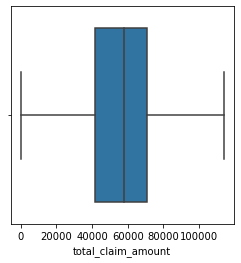

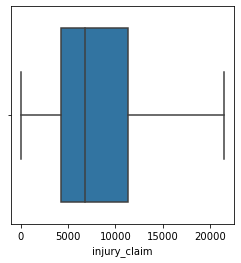

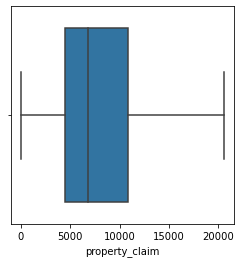

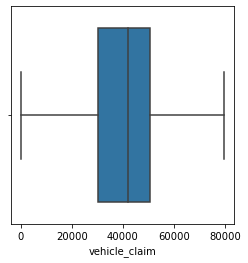

In [31]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### Outliers has been removed.

## Skewness

In [32]:
df.skew()

months_as_customer             0.362177
age                            0.469878
policy_deductable              0.477887
policy_annual_premium          0.016003
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.595351
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
dtype: float64

In [33]:
from sklearn.preprocessing import PowerTransformer
s=['total_claim_amount','vehicle_claim']
pt = PowerTransformer(method = 'yeo-johnson')
for i in s:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

### Skewness is removed from data.

## Encoding

In [35]:
# extracting categorical columns
cate = df.select_dtypes(include = ['object'])

In [36]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in cate:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328.0,48.0,1,1000.0,1406.91,1,4,2,0,53300.0,0.0,2,2,0,4,5.0,1.0,1,1.0,2.0,1,0.715849,6510.0,13020.0,0.753697,1
1,228.0,42.0,1,2000.0,1197.22,1,4,6,2,0.0,0.0,3,1,1,4,8.0,1.0,0,0.0,0.0,0,-1.776997,780.0,780.0,-1.786629,1
2,134.0,29.0,0,2000.0,1413.14,0,6,11,3,35100.0,0.0,0,1,1,4,7.0,3.0,0,2.0,3.0,0,-0.716996,7700.0,3850.0,-0.820881,0
3,256.0,41.0,1,2000.0,1415.74,0,6,1,4,48900.0,-62400.0,2,0,0,4,5.0,1.0,0,1.0,2.0,0,0.391464,6340.0,6340.0,0.677602,1
4,228.0,44.0,2,1000.0,1583.91,1,0,11,4,66000.0,-46000.0,3,1,1,2,20.0,1.0,0,0.0,1.0,0,-1.729844,1300.0,650.0,-1.740038,0


<AxesSubplot:>

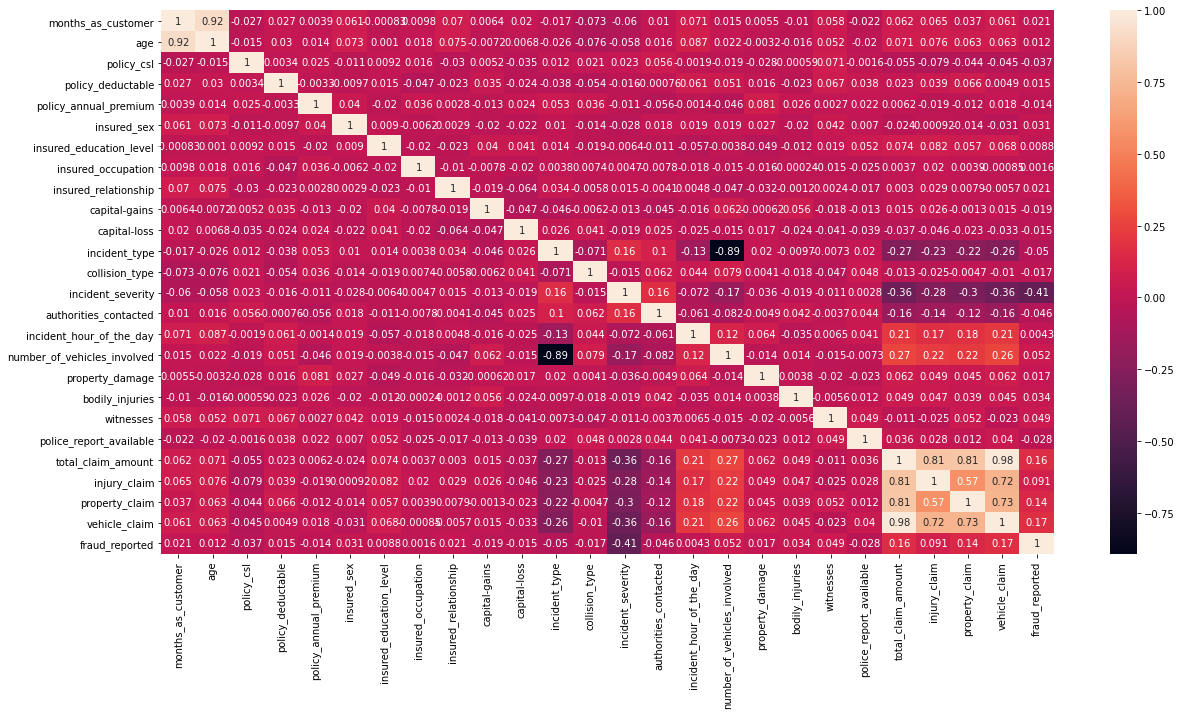

In [39]:
cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

### We can see multicollinearity between the columns which we can remove by VIF.

In [40]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

## VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,27.897581,months_as_customer
1,129.946912,age
2,2.444930,policy_csl
3,4.586485,policy_deductable
4,28.755767,policy_annual_premium
5,1.900491,insured_sex
6,3.408142,insured_education_level
7,3.781102,insured_occupation
8,3.128530,insured_relationship
9,1.845584,capital-gains


### We should drop the column with highest VIF score until all the values are below 5.

In [42]:
x.drop(['total_claim_amount'],axis=1,inplace=True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,22.894050,months_as_customer
1,95.008649,age
2,2.433476,policy_csl
3,4.535470,policy_deductable
4,23.767065,policy_annual_premium
5,1.900438,insured_sex
6,3.353259,insured_education_level
7,3.714993,insured_occupation
8,3.092698,insured_relationship
9,1.836794,capital-gains


In [45]:
x.drop(['age'],axis=1,inplace=True)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,4.169004,months_as_customer
1,2.417483,policy_csl
2,4.514217,policy_deductable
3,21.254271,policy_annual_premium
4,1.897298,insured_sex
5,3.328250,insured_education_level
6,3.675421,insured_occupation
7,3.065758,insured_relationship
8,1.836675,capital-gains
9,1.938104,capital-loss


In [47]:
x.drop(['policy_annual_premium'],axis=1,inplace=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,4.127015,months_as_customer
1,2.394618,policy_csl
2,4.481809,policy_deductable
3,1.891217,insured_sex
4,3.312211,insured_education_level
5,3.600928,insured_occupation
6,3.039432,insured_relationship
7,1.835496,capital-gains
8,1.936929,capital-loss
9,5.758862,incident_type


In [49]:
x.drop(['number_of_vehicles_involved'],axis=1,inplace=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,3.995855,months_as_customer
1,2.359560,policy_csl
2,4.295162,policy_deductable
3,1.859607,insured_sex
4,3.207756,insured_education_level
5,3.489217,insured_occupation
6,2.999420,insured_relationship
7,1.803560,capital-gains
8,1.928152,capital-loss
9,2.301577,incident_type


In [51]:
x.drop(['property_claim'],axis=1,inplace=True)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,3.984491,months_as_customer
1,2.355669,policy_csl
2,4.169937,policy_deductable
3,1.856168,insured_sex
4,3.181130,insured_education_level
5,3.452578,insured_occupation
6,2.977612,insured_relationship
7,1.802620,capital-gains
8,1.926597,capital-loss
9,2.298244,incident_type


In [53]:
x.drop(['injury_claim'],axis=1,inplace=True)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,3.928482,months_as_customer
1,2.355669,policy_csl
2,4.061002,policy_deductable
3,1.845025,insured_sex
4,3.106266,insured_education_level
5,3.378736,insured_occupation
6,2.927482,insured_relationship
7,1.794798,capital-gains
8,1.916360,capital-loss
9,2.297099,incident_type


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity in data is removed.

## Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,months_as_customer,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,1.078140,0.060937,-0.222383,1.076953,0.530931,-1.158316,-1.437957,1.011331,0.953851,0.766005,1.344000,-1.260614,1.196963,-0.956261,1.520282,0.009759,0.461838,1.478078,0.753697
1,0.208995,0.060937,1.412784,1.076953,0.530931,-0.162558,-0.247595,-0.901927,0.953851,1.691132,-0.030233,-0.195906,1.196963,-0.524475,-0.657773,-1.210174,-1.338700,-0.676554,-1.786629
2,-0.608002,-1.182668,1.412784,-0.928546,1.557877,1.082141,0.347586,0.358023,0.953851,-1.084249,-0.030233,-0.195906,1.196963,-0.668404,-0.657773,1.229693,1.362107,-0.676554,-0.820881
3,0.452355,0.060937,1.412784,-0.928546,1.557877,-1.407256,0.942766,0.853388,-1.267577,0.766005,-1.404466,-1.260614,1.196963,-0.956261,-0.657773,0.009759,0.461838,-0.676554,0.677602
4,0.208995,1.304542,-0.222383,1.076953,-1.522961,1.082141,0.942766,1.467210,-0.683741,1.691132,-0.030233,-0.195906,-0.109052,1.202666,-0.657773,-1.210174,-0.438431,-0.676554,-1.740038


## Sampling

In [57]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [58]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

## Choosing Random State Value

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.847682119205298 ran state= 125


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxran)

## Model Selection

### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
dtc_clas1=classification_report(y_test,pred1)
acc1=accuracy_score(y_test,pred1)
print(acc1)
print(dtc_clas1)

0.8410596026490066
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.87      0.84      0.85       165

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



In [62]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,pred1)
con1

array([[116,  21],
       [ 27, 138]], dtype=int64)

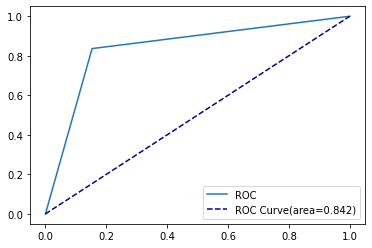

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, pred1)
area_under_curve=roc_auc_score(y_test, pred1)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred2=rfc.predict(x_test)
rfc_clas2=classification_report(y_test,pred2)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print(rfc_clas2)

0.8576158940397351
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       137
           1       0.89      0.85      0.87       165

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



In [65]:
con2=confusion_matrix(y_test,pred2)
con2

array([[119,  18],
       [ 25, 140]], dtype=int64)

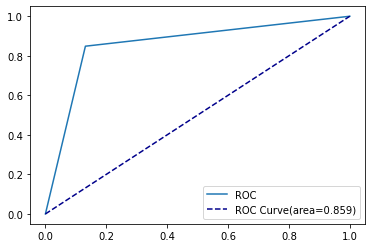

In [66]:
fpr, tpr, thresholds =roc_curve(y_test, pred2)
area_under_curve=roc_auc_score(y_test, pred2)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Support Vectors

In [67]:
from sklearn.svm import SVC
sup=SVC()
sup.fit(x_train,y_train)
pred3=sup.predict(x_test)
sv_clas3=classification_report(y_test,pred3)
acc3=accuracy_score(y_test,pred3)
print(acc3)
print(sv_clas3)

0.8774834437086093
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       137
           1       0.89      0.89      0.89       165

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [68]:
con3=confusion_matrix(y_test,pred3)
con3

array([[118,  19],
       [ 18, 147]], dtype=int64)

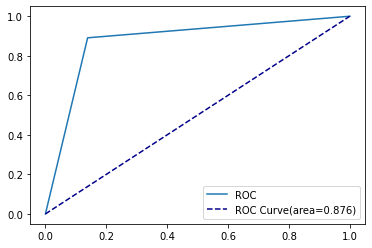

In [69]:
fpr, tpr, thresholds =roc_curve(y_test, pred3)
area_under_curve=roc_auc_score(y_test, pred3)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred4=lr.predict(x_test)
lr_clas4=classification_report(y_test,pred4)
acc4=accuracy_score(y_test,pred4)
print(acc4)
print(lr_clas4)

0.7317880794701986
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       137
           1       0.78      0.70      0.74       165

    accuracy                           0.73       302
   macro avg       0.73      0.73      0.73       302
weighted avg       0.74      0.73      0.73       302



In [71]:
con4=confusion_matrix(y_test,pred4)
con4

array([[105,  32],
       [ 49, 116]], dtype=int64)

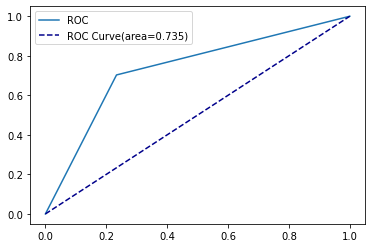

In [72]:
fpr, tpr, thresholds =roc_curve(y_test, pred4)
area_under_curve=roc_auc_score(y_test, pred4)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=7).mean()
cv2=cross_val_score(rfc,x,y,cv=7).mean()
cv3=cross_val_score(sup,x,y,cv=7).mean()
cv4=cross_val_score(lr,x,y,cv=7).mean()
print(cv1,cv2,cv3,cv4)

0.800224560108281 0.8699304786514089 0.8506552233296418 0.7549895410360526


In [74]:
print(abs(acc1-cv1),abs(acc2-cv2),abs(acc3-cv3),abs(acc4-cv4))

0.040835042540725563 0.012314584611673784 0.026828220378967482 0.02320146156585401


### We can choose Random Forest Classifier as our model since its cv_score and accuracy score are almost similar.

In [75]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': [5,20,50,100],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
           'bootstrap':[True,False]}
gsc=GridSearchCV(rfc,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [76]:
fin_fraud_model=RandomForestClassifier(bootstrap=False, criterion='entropy', max_features='log2', n_estimators= 100)
fin_fraud_model.fit(x_train,y_train)
pred5=fin_fraud_model.predict(x_test)
rf_acc=accuracy_score(y_test,pred5)
print("Final_Accuracy:",rf_acc*100)

Final_Accuracy: 86.75496688741721


In [77]:
con5=confusion_matrix(y_test,pred5)
con5

array([[120,  17],
       [ 23, 142]], dtype=int64)

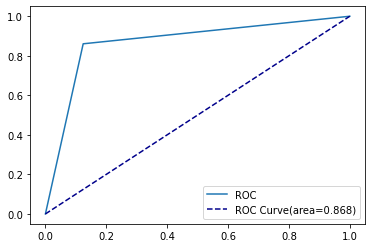

In [78]:
fpr, tpr, thresholds =roc_curve(y_test, pred5)
area_under_curve=roc_auc_score(y_test, pred5)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Saving the Model

In [79]:
import joblib
joblib.dump(fin_fraud_model,'Final_fraud_mod.pkl')

['Final_fraud_mod.pkl']